In [50]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import os
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import layers, models, optimizers
from tensorflow.keras import backend as k
from tensorflow.keras.applications import VGG16

In [17]:
train_dir='C:\\Lachin\\DataSets\\train'
validation_dir='C:\\Lachin\\DataSets\\validation'
test_dir='C:\\Lachin\\DataSets\\test'

In [18]:
train_datagen=ImageDataGenerator(rescale=1./255)
test_datagen=ImageDataGenerator(rescale=1./255)
train_generator=train_datagen.flow_from_directory(train_dir, target_size=(150,150),batch_size=20, class_mode='binary')
valid_generator=test_datagen.flow_from_directory(validation_dir, target_size=(150,150), batch_size=20, class_mode='binary')

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


- Image Generator is the best practice becuase data augmentation can be done very easily

In [21]:
model=models.Sequential()
model.add(layers.Conv2D(32,(3,3),activation='relu',input_shape=(150,150,3)))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(64,(3,3), activation='relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(128,(3,3), activation='relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(128,(3,3), activation='relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Flatten())
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1,activation='sigmoid'))

In [22]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 15, 15, 128)       1

In [25]:
model.compile(loss='binary_crossentropy', optimizer=optimizers.RMSprop(1e-4), metrics=['accuracy'])

In [27]:
model_hist=model.fit_generator(train_generator, steps_per_epoch=100, epochs=30, validation_data=valid_generator, validation_steps=50)

Epoch 1/30
100/100 [==============================] - 42s 423ms/step - loss: 0.6319 - accuracy: 0.6590 - val_loss: 0.6255 - val_accuracy: 0.6590
Epoch 2/30
100/100 [==============================] - 45s 447ms/step - loss: 0.5799 - accuracy: 0.6905 - val_loss: 0.5958 - val_accuracy: 0.6610
Epoch 3/30
100/100 [==============================] - 45s 447ms/step - loss: 0.5449 - accuracy: 0.7260 - val_loss: 0.5936 - val_accuracy: 0.6710
Epoch 4/30
100/100 [==============================] - 45s 451ms/step - loss: 0.5107 - accuracy: 0.7495 - val_loss: 0.6028 - val_accuracy: 0.6800
Epoch 5/30
100/100 [==============================] - 45s 447ms/step - loss: 0.4727 - accuracy: 0.7810 - val_loss: 0.5896 - val_accuracy: 0.6880
Epoch 6/30
100/100 [==============================] - 46s 457ms/step - loss: 0.4393 - accuracy: 0.8040 - val_loss: 0.5872 - val_accuracy: 0.6880
Epoch 7/30
100/100 [==============================] - 47s 474ms/step - loss: 0.4103 - accuracy: 0.8055 - val_loss: 0.6131 - val_ac

- Here addition to model.fit, model.fit_generator used because now the input data is coming batch sizze 0f 20 from directory
- steps_per_epochs means we are getting batch size 0f 20 from training set of 2000 data hence steps_per_epoch=2000/20
- same goes with validation_steps, validation_steps=1000/20

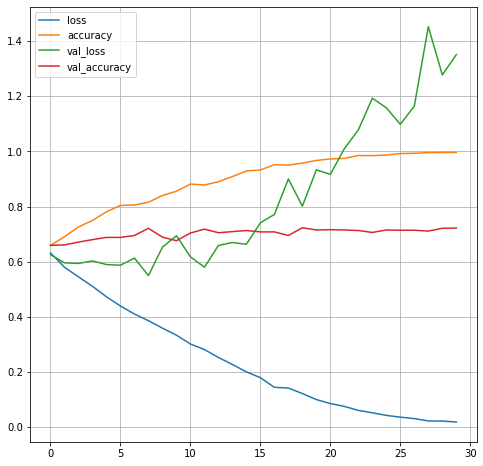

In [28]:
pd.DataFrame(model_hist.history).plot(figsize=(8,8))
plt.grid(True)


- Data set is overfitted 

In [29]:
model.save('CNN1')

INFO:tensorflow:Assets written to: CNN1\assets


In [31]:
k.clear_session()

In [32]:
del model

## Data Augmentation

In [36]:
train_datagen=ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True)
test_datagen=ImageDataGenerator(rescale=1./255)
train_generator=train_datagen.flow_from_directory(train_dir,target_size=(150,150), batch_size=32,class_mode='binary')
valid_generator=test_datagen.flow_from_directory(validation_dir, target_size=(150,150),batch_size=32,class_mode='binary')

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [39]:
model = models.Sequential()
model.add(layers.InputLayer(input_shape=(150,150,3)))
model.add(layers.Conv2D(32, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dropout(0.5))
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(9, activation='sigmoid'))

- Here dropout layer is used to stop overfitting 
- Usuall it negelct 50% neurons and train the model
- we can use input layer function or can insert input shape attrubute to convolutional layer

In [40]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 15, 15, 128)       1

In [41]:
model.compile(loss='binary_crossentropy', optimizer=optimizers.RMSprop(1e-4),metrics=['accuracy'])

In [45]:
model_f=model.fit_generator(train_generator, steps_per_epoch=62,epochs=30,validation_data=valid_generator, validation_steps=31)

Epoch 1/30
62/62 [==============================] - 43s 695ms/step - loss: 0.6650 - accuracy: 0.5879 - val_loss: 0.6437 - val_accuracy: 0.6079
Epoch 2/30
62/62 [==============================] - 46s 747ms/step - loss: 0.6506 - accuracy: 0.6026 - val_loss: 0.6832 - val_accuracy: 0.5333
Epoch 3/30
62/62 [==============================] - 46s 746ms/step - loss: 0.6462 - accuracy: 0.6377 - val_loss: 0.6200 - val_accuracy: 0.6401
Epoch 4/30
62/62 [==============================] - 47s 750ms/step - loss: 0.6246 - accuracy: 0.6489 - val_loss: 0.6374 - val_accuracy: 0.6381
Epoch 5/30
62/62 [==============================] - 47s 750ms/step - loss: 0.6192 - accuracy: 0.6484 - val_loss: 0.5903 - val_accuracy: 0.6875
Epoch 6/30
62/62 [==============================] - 47s 758ms/step - loss: 0.6111 - accuracy: 0.6565 - val_loss: 0.6118 - val_accuracy: 0.6613
Epoch 7/30
62/62 [==============================] - 46s 748ms/step - loss: 0.5981 - accuracy: 0.6616 - val_loss: 0.6055 - val_accuracy: 0.6663

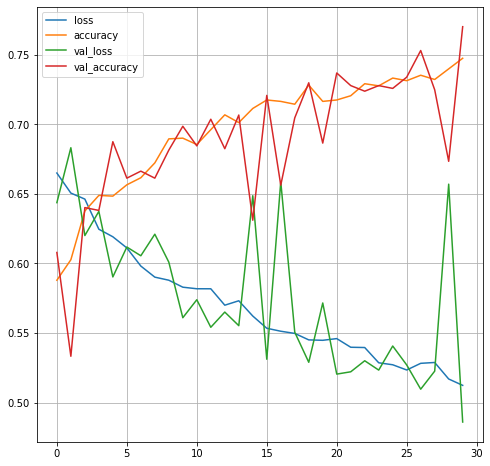

In [46]:
pd.DataFrame(model_f.history).plot(figsize=(8,8))
plt.grid(True)

In [47]:
model.save('CNN2.h5')

In [48]:
keras.backend.clear_session()
del model

## Transfer Learning

# VGG16

In [49]:
train_datagen=ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True)
test_datagen=ImageDataGenerator(rescale=1./255)
train_generator=train_datagen.flow_from_directory(train_dir,target_size=(150,150), batch_size=32,class_mode='binary')
valid_generator=test_datagen.flow_from_directory(validation_dir, target_size=(150,150),batch_size=32,class_mode='binary')

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [51]:
conv_base=VGG16(weights='imagenet',include_top=False,input_shape=(150,150,3))

58892288/58889256 [==============================] - 38s 1us/step


In [52]:
conv_base.summary()

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 150, 150, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 150, 150, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 150, 150, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 75, 75, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 75, 75, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 75, 75, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 37, 37, 128)       0     

In [55]:
model=models.Sequential()
model.add(conv_base)
model.add(layers.Flatten())
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

In [56]:
model.compile(loss='categorical_crossentropy',optimizer=optimizers.RMSprop(lr=2e-5), metrics=['accuracy'])

C:\Users\acer\anaconda3\lib\site-packages\tensorflow\python\keras\optimizer_v2\optimizer_v2.py:374: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  warnings.warn(


In [60]:
callback_cb=keras.callbacks.ModelCheckpoint('CNN_Project_Model-{epoch:02d}')

In [63]:
 model_tp=model.fit_generator(train_generator, steps_per_epoch=62,epochs=30,validation_data=valid_generator,validation_steps=31,callbacks=[callback_cb])

C:\Users\acer\anaconda3\lib\site-packages\tensorflow\python\keras\engine\training.py:1940: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/30
62/62 [==============================] - 639s 10s/step - loss: 0.2918 - accuracy: 0.8765 - val_loss: 0.2008 - val_accuracy: 0.9234
INFO:tensorflow:Assets written to: CNN_Project_Model-01\assets
Epoch 2/30
62/62 [==============================] - 632s 10s/step - loss: 0.2169 - accuracy: 0.9090 - val_loss: 0.1408 - val_accuracy: 0.9446
INFO:tensorflow:Assets written to: CNN_Project_Model-02\assets
Epoch 3/30
62/62 [==============================] - 632s 10s/step - loss: 0.1964 - accuracy: 0.9172 - val_loss: 0.0983 - val_accuracy: 0.9637
INFO:tensorflow:Assets written to: CNN_Project_Model-03\assets
Epoch 4/30
62/62 [==============================] - 633s 10s/step - loss: 0.1725 - accuracy: 0.9273 - val_loss: 0.0839 - val_accuracy: 0.9627
INFO:tensorflow:Assets written to: CNN_Project_Model-04\assets
Epoch 5/30
62/62 [==============================] - 624s 10s/step - loss: 0.1479 - accuracy: 0.9426 - val_loss: 0.1280 - val_accuracy: 0.9536
INFO:tensorflow:Assets written to: CNN

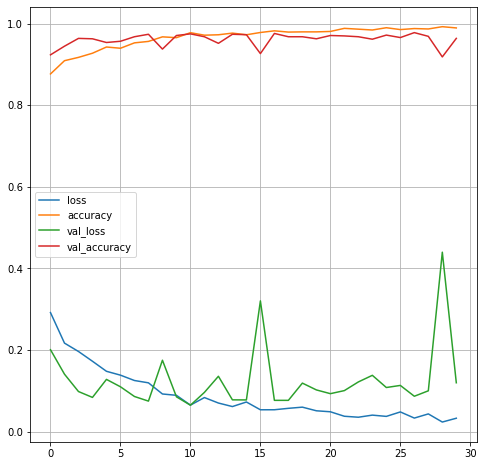

In [64]:
pd.DataFrame(model_tp.history).plot(figsize=(8,8))
plt.grid(True)

In [65]:
df=pd.DataFrame(model_tp.history)

In [66]:
df

,loss,accuracy,val_loss,val_accuracy
0,0.291761,0.876524,0.200758,0.923387
1,0.216941,0.909045,0.140814,0.944556
2,0.196427,0.917175,0.098279,0.963710
3,0.172481,0.927337,0.083897,0.962702
4,0.147868,0.942581,0.128042,0.953629
5,0.138419,0.939533,0.109930,0.956653
6,0.125295,0.952744,0.086134,0.967742
7,0.119611,0.956301,0.074812,0.973790
8,0.092274,0.967480,0.175004,0.937500
9,0.089015,0.965447,0.085364,0.970766


In [68]:
df['val_accuracy'].idxmax()

26

In [69]:
test_generator = test_datagen.flow_from_directory(
        test_dir,
        target_size=(150, 150),
        batch_size=20,
        class_mode='binary')

Found 1000 images belonging to 2 classes.


In [70]:
model.evaluate_generator(test_generator, steps=50)

C:\Users\acer\anaconda3\lib\site-packages\tensorflow\python\keras\engine\training.py:1973: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  warnings.warn('`Model.evaluate_generator` is deprecated and '


[0.13494282960891724, 0.9660000205039978]